# Bitcoin Price Time Series Analysis

In [13]:
%run -i 'data/bitcoin.py'

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [15]:
# import data
bitcoin.head()

,High,Low,Last,Bid,Ask,Volume,VWAP
Date,,,,,,,
2014-04-15,515.00,453.16,499.01,500.01,505.04,28535.844106,491.41
2014-04-16,548.00,494.02,534.00,535.01,536.00,31159.941300,520.21
2014-04-17,537.24,481.63,506.52,504.70,505.38,21126.375080,504.83
2014-04-18,508.43,470.00,487.00,484.14,487.00,11879.484756,485.72
2014-04-19,507.43,472.81,504.74,504.74,505.00,10262.195861,492.22


## Univariate Time Series Analysis

In [76]:
uni_data = bitcoin['VWAP']
uni_data.index = bitcoin.index
uni_data.head()

Date
2014-04-15    491.41
2014-04-16    520.21
2014-04-17    504.83
2014-04-18    485.72
2014-04-19    492.22
Name: VWAP, dtype: float64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fc285757d30>],
      dtype=object)

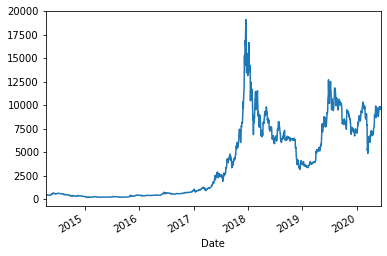

In [77]:
uni_data.plot(subplots=True)

In [78]:
uni_data = uni_data.values
uni_data

array([ 491.41,  520.21,  504.83, ..., 9724.82, 9722.05, 9819.66])

In [79]:
train_split = len(uni_data)-10
uni_train_mean = uni_data[:train_split].mean()
uni_train_std = uni_data[:train_split].std()

uni_data = (uni_data - uni_train_mean) / uni_train_std

In [211]:
import numpy as np
train_data = []
train_labels = []

# set index 
# model will be given 20 bitcoin prices
start_index = 20
end_index = train_split

for i in range(start_index, end_index):
    indices = range(i - 20, i)
    train_data.append(np.reshape(uni_data[indices], (20, 1)))
    train_labels.append(uni_data[i])
    
train_data = np.array(train_data)
train_labels = np.array(train_labels)

In [212]:
train_data.shape

(2193, 20, 1)

In [221]:
valid_data = []
valid_labels = []

# set index 
# model will be given 20 bitcoin prices
start_index = train_split

for i in range(start_index, len(uni_data)):
    indices = range(i - 20, i)
    valid_data.append(np.reshape(uni_data[indices], (20, 1)))
    valid_labels.append(uni_data[i])
    
valid_data = np.array(valid_data)
valid_labels = np.array(valid_labels)

In [235]:
model = keras.models.Sequential([
    keras.layers.LSTM(8, return_sequences=True, input_shape=train_data.shape[-2:]),
    keras.layers.Dense(1)
])

model.compile(loss="mse", optimizer="adam")

In [236]:
model.summary()

Model: "sequential_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_41 (LSTM)               (None, 20, 8)             320       
_________________________________________________________________
dense_18 (Dense)             (None, 20, 1)             9         
Total params: 329
Trainable params: 329
Non-trainable params: 0
_________________________________________________________________


In [238]:
history = model.fit(train_data, train_labels, epochs=20, validation_data = (valid_data, valid_labels))

Epoch 1/20
69/69 [==============================] - 1s 9ms/step - loss: 0.0469 - val_loss: 0.0125
Epoch 2/20
69/69 [==============================] - 0s 5ms/step - loss: 0.0468 - val_loss: 0.0144
Epoch 3/20
69/69 [==============================] - 0s 5ms/step - loss: 0.0466 - val_loss: 0.0139
Epoch 4/20
69/69 [==============================] - 0s 5ms/step - loss: 0.0465 - val_loss: 0.0075
Epoch 5/20
69/69 [==============================] - 0s 5ms/step - loss: 0.0465 - val_loss: 0.0111
Epoch 6/20
69/69 [==============================] - 0s 6ms/step - loss: 0.0464 - val_loss: 0.0128
Epoch 7/20
69/69 [==============================] - 0s 5ms/step - loss: 0.0462 - val_loss: 0.0097
Epoch 8/20
69/69 [==============================] - 0s 6ms/step - loss: 0.0463 - val_loss: 0.0094
Epoch 9/20
69/69 [==============================] - 0s 5ms/step - loss: 0.0463 - val_loss: 0.0112
Epoch 10/20
69/69 [==============================] - 0s 5ms/step - loss: 0.0462 - val_loss: 0.0100
Epoch 11/20
69/69 [

In [241]:
predict = model.predict(valid_data)

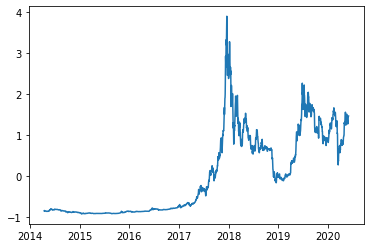

In [250]:
train_date = bitcoin.index[:train_split]
data_train = uni_data[:train_split].tolist()

plt.plot(train_date, data_train)
plt.show()

## Multivariate Time Series Analysis

In [110]:
# create new time series data
features = bitcoin[['High', 'Low', 'Last', 'Bid', 'Ask', 'VWAP']]
features.index = bitcoin.index
features.head()

,High,Low,Last,Bid,Ask,VWAP
Date,,,,,,
2014-04-15,515.00,453.16,499.01,500.01,505.04,491.41
2014-04-16,548.00,494.02,534.00,535.01,536.00,520.21
2014-04-17,537.24,481.63,506.52,504.70,505.38,504.83
2014-04-18,508.43,470.00,487.00,484.14,487.00,485.72
2014-04-19,507.43,472.81,504.74,504.74,505.00,492.22


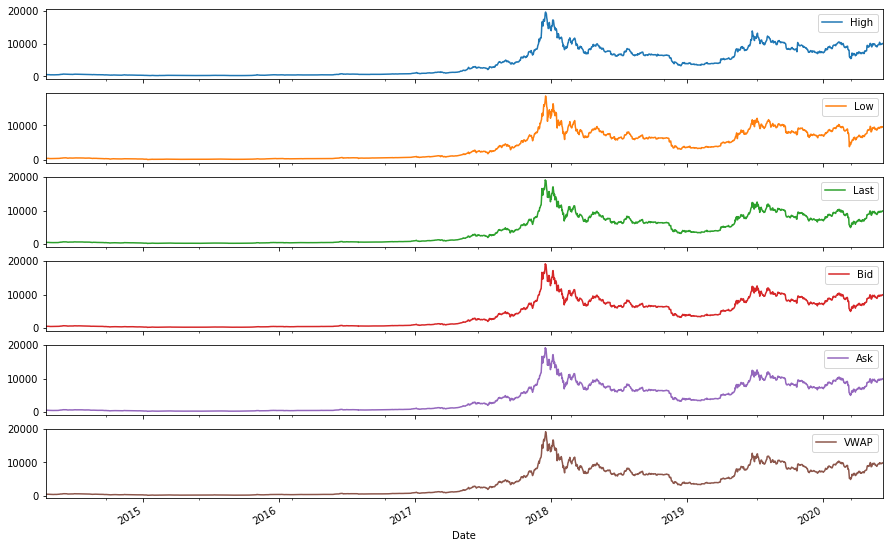

In [111]:
features.plot(subplots=True, figsize=(15, 10))
plt.show()

In [135]:
TRAIN_SPLIT = len(features) - 10
dataset = features.values
data_mean = dataset[:TRAIN_SPLIT].mean()
data_std = dataset[:TRAIN_SPLIT].std()

In [122]:
dataset = (dataset-data_mean) / data_std

In [189]:
data = []
labels = []

for i in range(0, TRAIN_SPLIT):
    data.append(dataset[i])
    labels.append(dataset[:, -1][i])

x_train_multi = np.array(data)
y_train_multi = np.array(labels)

# x_train_multi = x_train_multi.reshape((2213, 6, 1))

In [190]:
data = []
labels = []

for i in range(TRAIN_SPLIT, len(dataset)):
    data.append(dataset[i])
    labels.append(dataset[:, -1][i])
    
x_val_multi = np.array(data)
y_val_multi = np.array(labels)

In [196]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.LSTM(32, input_shape=(2213, 6), return_sequences=True))
model.add(tf.keras.layers.Dense(10))

model.compile(optimizer=tf.keras.optimizers.RMSprop(), loss='mae')

In [ ]:
history = model.fit(x_train_multi, y_train_multi, epochs=20, 
                    validation_data=(x_val_multi, y_val_multi))